In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("intents_data.csv")
df.head(5)

Text      Intent
0        how are you  small_talk
1          what's up  small_talk
2  how are you doing  small_talk
3    how about today  small_talk
4     how are things  small_talk

In [3]:
df.Intent.value_counts()

small_talk    101
thanks        100
help          100
predict       100
get           100
set           100
calculate     100
definition    100
quit           97
Name: Intent, dtype: int64

In [4]:
df.isna().sum()

Text      0
Intent    0
dtype: int64

In [5]:
intent = df.Intent.map({
    "small_talk": 0,
    "thanks": 1, 
    "help": 2,     
    "predict": 3,
    "get": 4,
    "set": 5,        
    "get_past": 6,
    "calculate": 7,
    "definition": 8,
    "quit": 9
})

intent

0      0
1      0
2      0
3      0
4      0
      ..
893    8
894    8
895    8
896    8
897    8
Name: Intent, Length: 898, dtype: int64

In [6]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [7]:
def preprocess(text):
    doc = nlp(text)

    filter_word = []

    for token in doc:
        # if token.is_stop or token.is_punct:
        #     continue
        filter_word.append(token.lemma_)

    return " ".join(filter_word)

In [8]:
text = df.Text.apply(preprocess)

In [9]:
text

0                                    how be you
1                                    what be up
2                                 how be you do
3                               how about today
4                                  how be thing
                         ...                   
893           what be another word for ' word '
894      be there a technical term for ' word '
895    let I see ' word ' define in simple term
896            could you clarify ' word ' for I
897                       what do ' word ' mean
Name: Text, Length: 898, dtype: object

In [10]:
df1 = pd.concat([text, intent], axis="columns")

In [11]:
df1

Text  Intent
0                                  how be you       0
1                                  what be up       0
2                               how be you do       0
3                             how about today       0
4                                how be thing       0
..                                        ...     ...
893         what be another word for ' word '       8
894    be there a technical term for ' word '       8
895  let I see ' word ' define in simple term       8
896          could you clarify ' word ' for I       8
897                     what do ' word ' mean       8

[898 rows x 2 columns]

In [12]:
nlp("dog").vector

array([ 1.2330e+00,  4.2963e+00, -7.9738e+00, -1.0121e+01,  1.8207e+00,
        1.4098e+00, -4.5180e+00, -5.2261e+00, -2.9157e-01,  9.5234e-01,
        6.9880e+00,  5.0637e+00, -5.5726e-03,  3.3395e+00,  6.4596e+00,
       -6.3742e+00,  3.9045e-02, -3.9855e+00,  1.2085e+00, -1.3186e+00,
       -4.8886e+00,  3.7066e+00, -2.8281e+00, -3.5447e+00,  7.6888e-01,
        1.5016e+00, -4.3632e+00,  8.6480e+00, -5.9286e+00, -1.3055e+00,
        8.3870e-01,  9.0137e-01, -1.7843e+00, -1.0148e+00,  2.7300e+00,
       -6.9039e+00,  8.0413e-01,  7.4880e+00,  6.1078e+00, -4.2130e+00,
       -1.5384e-01, -5.4995e+00,  1.0896e+01,  3.9278e+00, -1.3601e-01,
        7.7732e-02,  3.2218e+00, -5.8777e+00,  6.1359e-01, -2.4287e+00,
        6.2820e+00,  1.3461e+01,  4.3236e+00,  2.4266e+00, -2.6512e+00,
        1.1577e+00,  5.0848e+00, -1.7058e+00,  3.3824e+00,  3.2850e+00,
        1.0969e+00, -8.3711e+00, -1.5554e+00,  2.0296e+00, -2.6796e+00,
       -6.9195e+00, -2.3386e+00, -1.9916e+00, -3.0450e+00,  2.48

In [13]:
x = df1.Text.apply(lambda text: nlp(text).vector)

In [14]:
x

0      [-1.4858333, 4.3986335, -7.876667, -2.3971665,...
1      [-3.3409336, 2.3557003, -4.4469, 5.1953664, 0....
2      [-0.24667501, 6.283725, -7.2217255, -3.56315, ...
3      [1.1462333, 1.7030834, -5.422133, -5.1364665, ...
4      [-2.1894267, 3.4425333, -5.944267, -2.3125665,...
                             ...                        
893    [-1.1269, 2.2525752, 2.8665748, -0.44589633, 3...
894    [-2.0438666, 2.8101997, 2.1679, 0.27380225, 4....
895    [0.76599896, 2.71203, 2.4563894, -1.5822748, 1...
896    [0.25212485, 2.3835173, 1.165175, -2.7433586, ...
897    [1.4229983, 3.8097517, 3.32357, -2.8093815, 0....
Name: Text, Length: 898, dtype: object

In [15]:
x = np.stack(x)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [17]:
for i in x:
    if i.shape[0] != 96:
        i.shape

In [18]:
y = df1.Intent

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=df1.Intent)

## Machine Learning

In [20]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.7166666666666667
              precision    recall  f1-score   support

           0       0.54      0.65      0.59        20
           1       0.69      0.55      0.61        20
           2       0.62      0.80      0.70        20
           3       0.68      0.85      0.76        20
           4       0.81      0.65      0.72        20
           5       0.78      0.70      0.74        20
           7       1.00      1.00      1.00        20
           8       1.00      0.65      0.79        20
           9       0.55      0.60      0.57        20

    accuracy                           0.72       180
   macro avg       0.74      0.72      0.72       180
weighted avg       0.74      0.72      0.72       180



In [21]:
test = "What is the prediction of the turnover"
test_vector = nlp(test).vector
test_vector = test_vector.reshape(-1, len(test_vector))
model.predict(test_vector)

array([8], dtype=int64)

In [22]:
# import joblib

# Save the model
# joblib.dump(model, "intent_classification_model")

Text(45.722222222222214, 0.5, 'Truth')

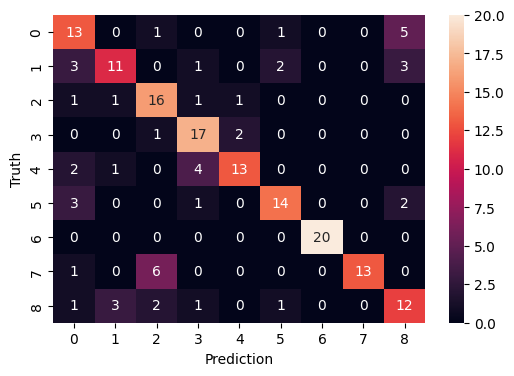

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (6,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [24]:
from  sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.8666666666666667
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        20
           1       0.82      0.70      0.76        20
           2       0.82      0.90      0.86        20
           3       0.78      0.90      0.84        20
           4       0.77      0.85      0.81        20
           5       0.90      0.90      0.90        20
           7       1.00      1.00      1.00        20
           8       1.00      0.95      0.97        20
           9       1.00      0.60      0.75        20

    accuracy                           0.87       180
   macro avg       0.88      0.87      0.86       180
weighted avg       0.88      0.87      0.86       180



In [25]:
test = "What is the prediction of the turnover"
test_vector = nlp(test).vector
test_vector = test_vector.reshape(-1, len(test_vector))
model.predict(test_vector)

array([8], dtype=int64)

In [26]:
from  sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.95
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.94      0.85      0.89        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      0.90      0.95        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       0.72      0.90      0.80        20

    accuracy                           0.95       180
   macro avg       0.96      0.95      0.95       180
weighted avg       0.96      0.95      0.95       180



In [27]:
test = "What is the prediction of the turnover"
test_vector = nlp(test).vector
test_vector = test_vector.reshape(-1, len(test_vector))
model.predict(test_vector)

array([9], dtype=int64)

In [28]:
from  sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.8888888888888888
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.89      0.80      0.84        20
           2       0.95      1.00      0.98        20
           3       0.86      0.90      0.88        20
           4       0.90      0.95      0.93        20
           5       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.86      0.95      0.90        20
           9       0.62      0.50      0.56        20

    accuracy                           0.89       180
   macro avg       0.88      0.89      0.88       180
weighted avg       0.88      0.89      0.88       180



In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

0.9611111111111111
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.85      0.85      0.85        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       0.91      1.00      0.95        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       0.94      0.85      0.89        20

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



In [30]:
test = "What is the prediction of the turnover"
test_vector = nlp(test).vector
test_vector = test_vector.reshape(-1, len(test_vector))
model.predict(test_vector)

array([5], dtype=int64)

## Deep Learning